In [ ]:
# Run: .\venv\Scripts\activate
# !pip3.11 install fastai --upgrade
# !pip3.11 install opencv-python
# !pip3.11 install pathlib
# Run in Python 3.11.0 

In [2]:
import torch
torch.cuda.is_available()

False

In [1]:
%reload_ext autoreload
%autoreload 2 
from glob import glob
from collections.abc import Iterable    
from fastai import *
from pathlib import Path
from fastai.vision import *
from fastai.vision.all import *
import os

In [2]:
import fastai
print(fastai.__version__)

2.7.13


## Resnet 34


In [3]:
path = Path('data')
print(path.ls())
# glob(str(path/'*'))

[Path('data/models'), Path('data/test'), Path('data/train')]


In [4]:
from fastai.vision.all import *
data1 = ImageDataLoaders.from_folder(path,
                                    train='train',
                                    valid='test',
                                    num_workers=12,
                                    item_tfms=Resize(460),
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

print(data1)

c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [7]:
# vision learner is the cnn_learner
# learn = cnn_learner(data1, models.resnet34, metrics=accuracy)
learn = vision_learner(data1, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [38]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5,3e-4), pct_start=0.05)

epoch     train_loss  valid_loss  accuracy  time    
0         0.397541    0.425814    0.870767  14:35                                        
1         0.326489    0.413875    0.874568  10:41                                        
2         0.274103    0.395231    0.889945  09:24                                        
3         0.218128    0.397329    0.887699  12:09                                        
4         0.180243    0.391957    0.889254  12:49                                        


In [42]:
accuracy(*learn.get_preds())

c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


TensorBase(0.8893)

In [44]:
learn.save("resnet34_model")

Path('data/models/resnet34_model.pth')

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


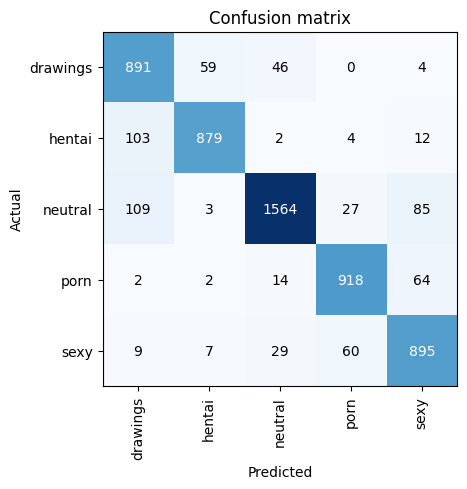

In [46]:
interp.plot_confusion_matrix()

In [5]:
print(path)
data1 = ImageDataLoaders.from_folder(path,
                                    train='train',
                                    valid='test',
                                    num_workers=12,
                                    item_tfms=Resize(460),
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

data


c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [6]:
from fastai.vision.all import *
from fastai.text.all import *


# To load the saved model

# Uncomment to see the vocab (classes) of the model
# learn.dls.vocab   
# data1 = ImageDataLoaders.from_folder(path,
#                                     train='train',
#                                     valid='test',
#                                     num_workers=12,
#                                     item_tfms=Resize(460),
#                                     batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

learn = vision_learner(data1, models.resnet34, metrics=accuracy)

learn = learn.load('resnet34_model')
pth = Path(r'D:\SPIT\MajorProject\NSFW_Model\raw_data\porn\IMAGES\99707718_013_6827.jpg')
prediction = learn.predict(pth)
print("Your Image classified as: " + prediction[0])
if(prediction[0] == "drawing" or prediction[0] == "neutral"):
    print("Your Image is Safe for Work !!")
else:
    print("Sorry your Image is Not Safe for Work !!")

c:\Users\amare\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Your Image classified as: porn
Sorry your Image is Not Safe for Work !!
